In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

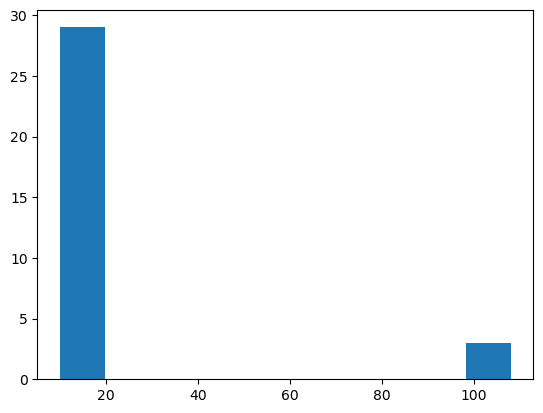

In [9]:
dataset = [11,10,12,14,12,15,14,13,15,104,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,12,10,14,13,15,10]
plt.hist(dataset)

<Axes: >

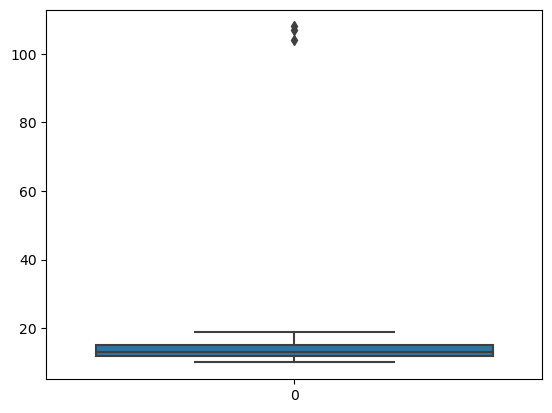

In [25]:
import seaborn as sns
sns.boxplot(dataset)

# Z Score

1. Find mean
2. Find standard deviation
3. Apply z score formula on each data point (xi - mean) / std
4. if the z score for particular data point is greatergreater than the threshold (3rd std dev 99.7%) is outliers

In [16]:
# Z Score 

def detect_outliers_z_score_way(data):
    
    outliers = []
    threshold = 3 # 3rd standard deviation (99.7%)
    mean = np.mean(data)
    std_dev = np.std(data)
    
    for xi in data:
        z_score = (xi - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(xi)
            
    return outliers

In [17]:
detect_outliers_z_score_way(dataset)

[104, 107, 108]

# IQR (Inter Quqrtile Range)

1. Sort data
2. Calculate Q1 & Q3
3. find IQR = (Q3 - Q1)
4. Find lower fence = (Q1 - 1.5(IQR))
5. Find upper fence = (Q3 + 1.5(IQR))
6. if x is not in between (lower to upper) then its outlier

In [19]:
# IQR

def detect_outliers_iqr_way(data):
    
    outliers = []
    data = sorted(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    for xi in data:
        if xi < lower or upper < xi:
            outliers.append(xi)
            
    return outliers    

In [20]:
detect_outliers_iqr_way(dataset)

[104, 107, 108]